In [1]:
import sys
sys.path.append('../codes/')
import gym
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from typing import Callable
from IPython import display
import seaborn as sns
import time
from custom_envs import CliffWalkingEnv
from utils import test_agent, plot_values, plot_policy


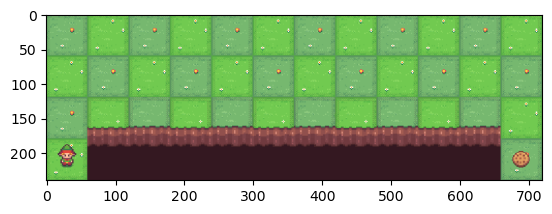

In [2]:
env = CliffWalkingEnv(render_mode="rgb_array")
env.reset()
img = env.render()
plt.imshow(img)

In [3]:
print('Observation space shape: ', env.observation_space)
print('NUmber of actions: ', env.action_space)

Observation space shape:  Discrete(48)
NUmber of actions:  Discrete(4)


In [4]:
policy_probs = np.full((48,4), 0.25)

In [5]:
def get_policy(state):
    return policy_probs[state]

In [6]:
action_prob = get_policy(36)

for action, prob in zip(range(4), action_prob):
    print('Action: {} Probability: {}'.format(action, prob))

Action: 0 Probability: 0.25
Action: 1 Probability: 0.25
Action: 2 Probability: 0.25
Action: 3 Probability: 0.25


In [7]:
# test_agent(env=env, policy=get_policy, episodes=1)

In [8]:
state_values = np.zeros((48,))

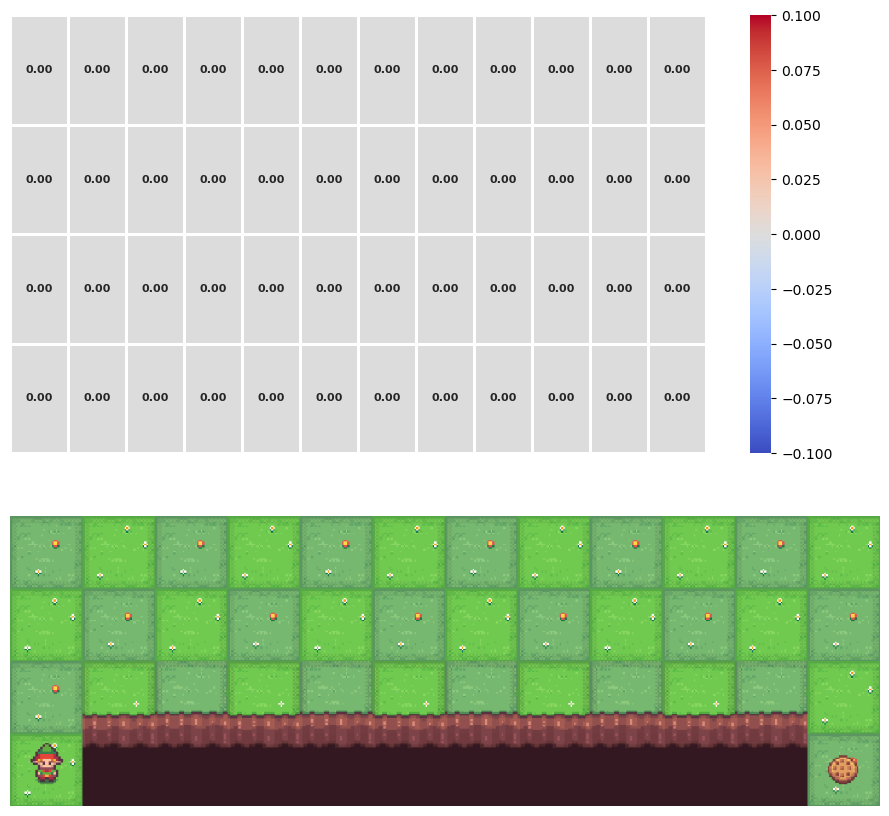

In [9]:
plot_values(state_values=state_values.reshape(4,-1), img=img)  

In [10]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float('inf')
    
    while delta > theta:
        delta = 0
      
        for row in range(4):
            for col in range(12):
                current_state = row * 12 + col
                
                if current_state > 37:
                    continue
                old_value = state_values[current_state]
                action_probs = None
                max_qsa = float("-inf")
                
                
                for action in range(4):
                    next_state, reward, is_terminated = env.simulate_step(current_state, action)
                    qsa = reward + gamma * state_values[next_state]
                    
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1
                        
                delta = max(delta, abs(max_qsa - old_value))
                        
                state_values[current_state] = max_qsa
                policy_probs[current_state] = action_probs
                
        

In [11]:
value_iteration(policy_probs=policy_probs, state_values=state_values)

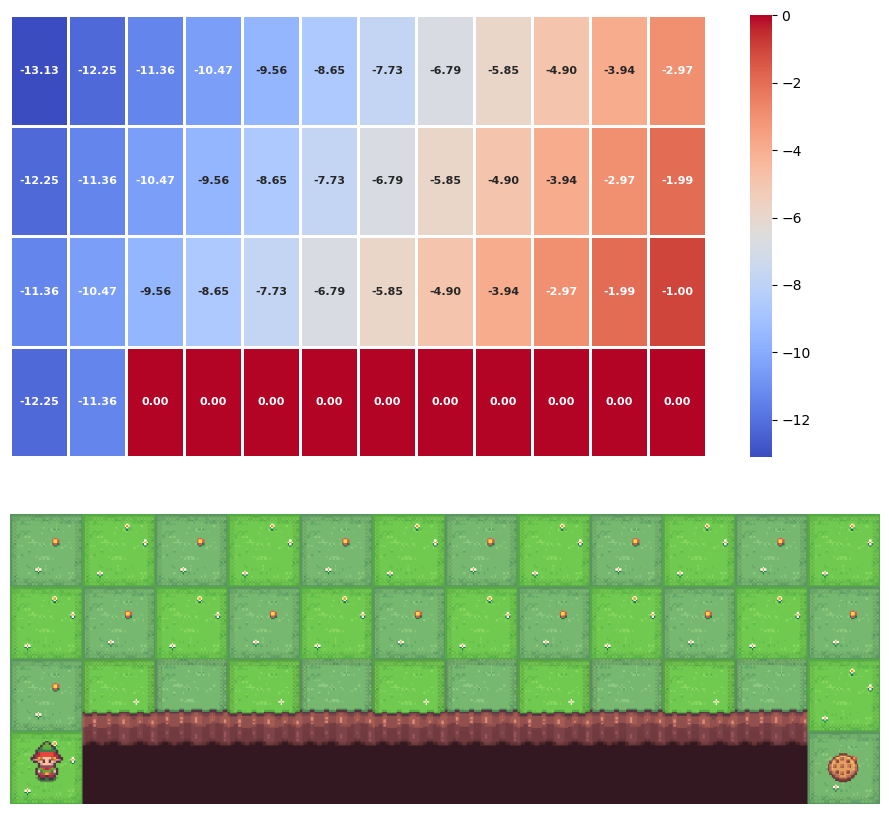

In [12]:
plot_values(state_values=state_values.reshape(4,-1), img=img)  

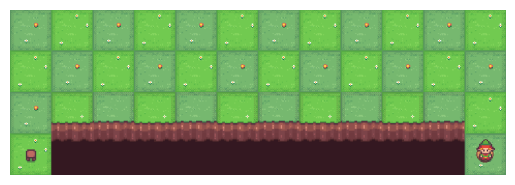

In [13]:
test_agent(env=env, policy=get_policy, episodes=1)